In [4]:
import pandas as pd

df = pd.read_csv('data.csv')

#Handling missing values

df['CHARGE/day of trainer'] = df['CHARGE/day of trainer'].replace('[\$,]', '', regex=True).astype(float)
df['CHARGE/day of trainer'].fillna(df['CHARGE/day of trainer'].mean(), inplace=True)
df['CITY'].fillna(df['CITY'].mode()[0], inplace=True)
df['MODE'].fillna(df['MODE'].mode()[0], inplace=True)
df['NO.OF PARTICIPANTS'].fillna(df['NO.OF PARTICIPANTS'].mode()[0], inplace=True)

#Keeping the first date if there are multiple dates
df['DATES'] = df['DATES'].str.split(',').str[0]
df['DATES'] = pd.to_datetime(df['DATES'], errors='coerce')
df.dropna(subset=['DATES'], inplace=True)

df.dropna(subset=['AVERAGE FEEDBACK(OUT OF 10)'], inplace=True)

# Check if the data is clean now
print(df.isnull().sum())


COMPANY                        0
COURSE                         0
DATES                          0
DURATION(no.of days)           0
CITY                           0
MODE                           0
NO.OF PARTICIPANTS             0
CHARGE/day of trainer          0
AVERAGE FEEDBACK(OUT OF 10)    0
dtype: int64


<ipython-input-4-9266b742cf8d>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATES'] = pd.to_datetime(df['DATES'], errors='coerce')


In [6]:
# Summary of numerical data
display(df.describe().round(2))

# Summary of categorical data
display(df.describe(include=['object']))


,DATES,DURATION(no.of days),NO.OF PARTICIPANTS,CHARGE/day of trainer,AVERAGE FEEDBACK(OUT OF 10)
count,65,65.00,65.00,65.00,65.00
mean,2020-08-24 09:58:09.230769152,2.72,15.63,29845.68,8.90
min,2018-04-10 00:00:00,1.50,5.00,15000.00,7.57
25%,2019-04-25 00:00:00,2.00,11.00,20000.00,8.70
50%,2020-01-28 00:00:00,2.00,14.00,25000.00,8.88
75%,2021-12-17 00:00:00,3.00,18.00,32000.00,9.20
max,2024-10-06 00:00:00,6.00,31.00,80000.00,10.00
std,NaN,1.05,6.61,16910.50,0.48


,COMPANY,COURSE,CITY,MODE
count,65,65,65,65
unique,23,10,13,2
top,IMTMA,GD&T,Bangalore,OFFLINE
freq,24,18,19,53


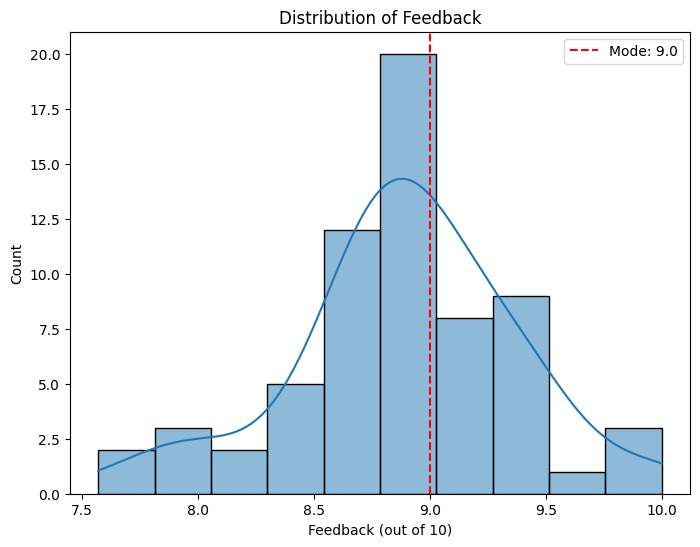

The peak (mode) value of the feedback is: 9.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of feedback with KDE
plt.figure(figsize=(8, 6))
sns.histplot(df['AVERAGE FEEDBACK(OUT OF 10)'], kde=True,)
plt.title('Distribution of Feedback')
plt.xlabel('Feedback (out of 10)')

# Calculate the mode of the feedback
feedback_mode = round(df['AVERAGE FEEDBACK(OUT OF 10)'].mode()[0], 2)

# Annotate the peak on the histogram
plt.axvline(feedback_mode, color='red', linestyle='--', label=f'Mode: {feedback_mode}')
plt.legend()

plt.show()

print(f"The peak (mode) value of the feedback is: {feedback_mode}")


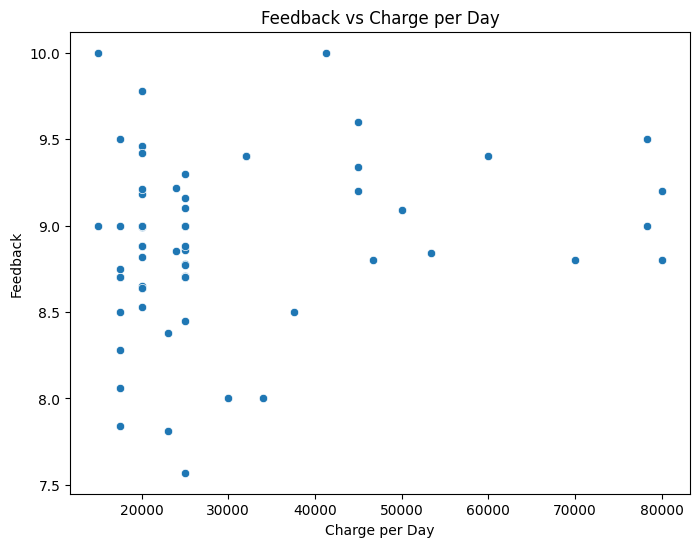

In [16]:
#Feedback vs Charge per Day
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CHARGE/day of trainer', y='AVERAGE FEEDBACK(OUT OF 10)', data=df)
plt.title('Feedback vs Charge per Day')
plt.xlabel('Charge per Day')
plt.ylabel('Feedback')
plt.show()

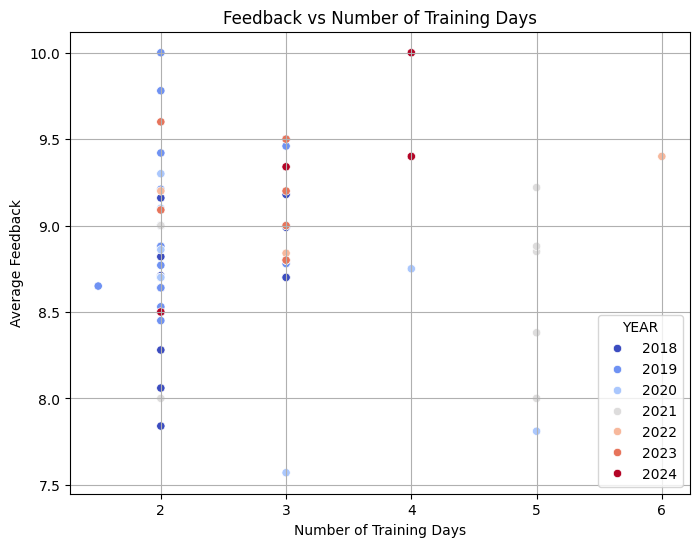

In [17]:
# Scatter plot of Feedback vs Number of Training Days

df['YEAR'] = df['DATES'].dt.year
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DURATION(no.of days)', y='AVERAGE FEEDBACK(OUT OF 10)', data=df, hue='YEAR', palette='coolwarm')
plt.title('Feedback vs Number of Training Days')
plt.xlabel('Number of Training Days')
plt.ylabel('Average Feedback')
plt.grid(True)
plt.show()


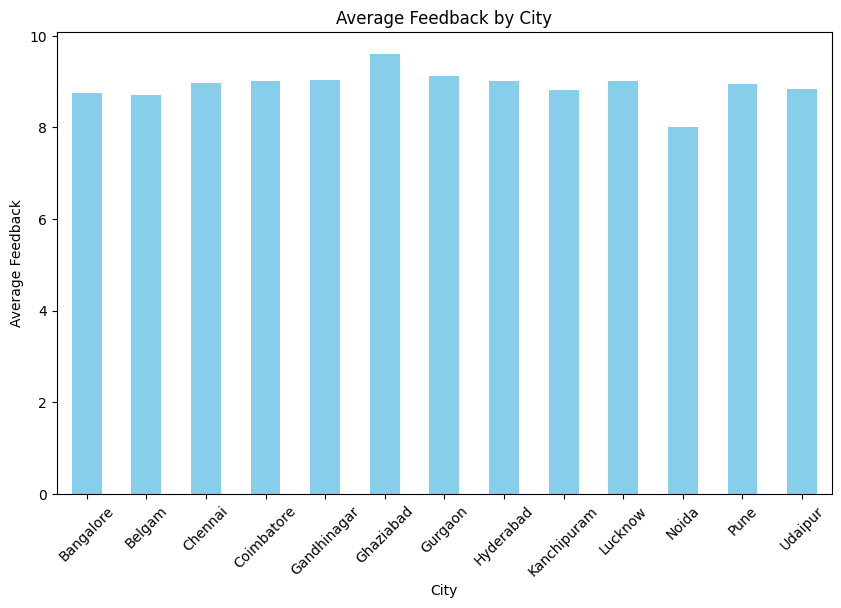

In [18]:
#Average feedback by city
city_feedback = df.groupby('CITY')['AVERAGE FEEDBACK(OUT OF 10)'].mean()

plt.figure(figsize=(10, 6))
city_feedback.plot(kind='bar', color='skyblue')
plt.title('Average Feedback by City')
plt.xlabel('City')
plt.ylabel('Average Feedback')
plt.xticks(rotation=45)
plt.show()

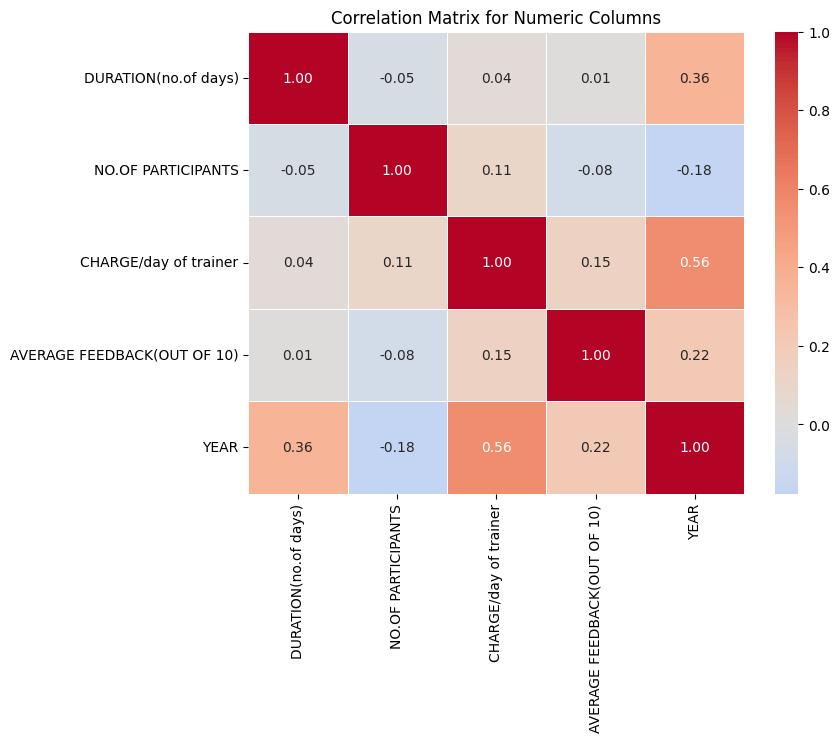

In [35]:
#Calculating correlation matrix
df['CHARGE/day of trainer'] = df['CHARGE/day of trainer'].replace('[\$,]', '', regex=True).astype(float)
import numpy as np
numeric_cols = df.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

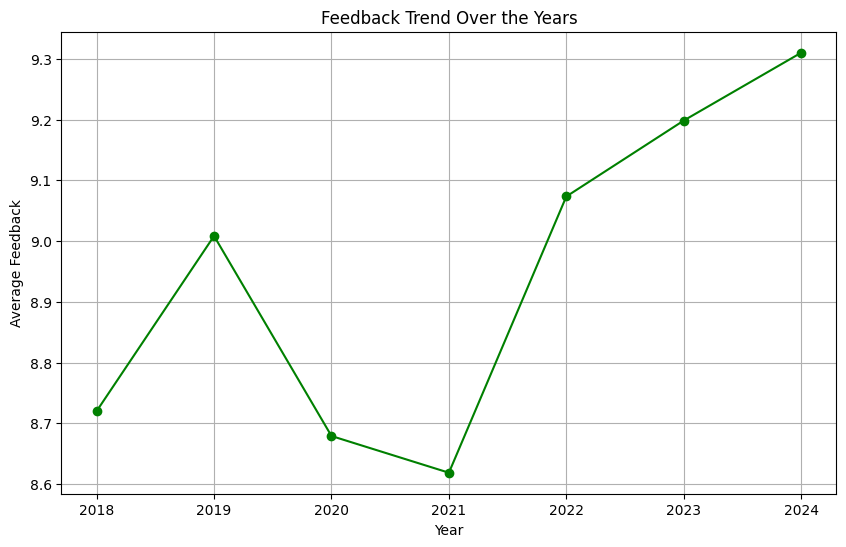

In [19]:
#Feedback Over the Years
feedback_by_year = df.groupby('YEAR')['AVERAGE FEEDBACK(OUT OF 10)'].mean()
plt.figure(figsize=(10, 6))
feedback_by_year.plot(kind='line', marker='o', color='green')
plt.title('Feedback Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Feedback')
plt.grid(True)
plt.show()